In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

pd.set_option("display.max_colwidth", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

SEED = 42

In [2]:
coffee_df = pd.read_csv('dataset/coffee.csv')

In [3]:
coffee_df.head()
coffee_df.dtypes

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


Region              object
Place name          object
Place type          object
Rating             float64
Reviews            float64
Price               object
Delivery option       bool
Dine in option      object
Takeout option      object
dtype: object

In [4]:
coffee_df['Region'].unique()
coffee_df['Region'].value_counts()
coffee_df['Region'].isna().sum()

array(['C', 'J', 'F', 'B', 'A', 'E', 'D', 'G', 'I', 'H'], dtype=object)

Region
C    20
J    20
F    20
B    20
A    20
E    20
D    20
G    20
I    20
H    20
Name: count, dtype: int64

0

In [5]:
len(coffee_df['Place name'].unique())
coffee_df['Place name'].value_counts()
coffee_df['Place name'].isna().sum()

187

Place name
Dim Kavy                                                        4
coffee House                                                    3
Coffee House                                                    3
MY COFFEE                                                       2
Lviv Coffee Manufacture                                         2
Svit Kavy                                                       2
Kaffa                                                           2
SV Кафе                                                         2
Sweeter                                                         2
Dva Gusya Pizza                                                 1
Антикафе 7/9 | Кривой Рог                                       1
Чай Кофе                                                        1
Coffee Craft                                                    1
ЕТУАЛЬ КАФЕ                                                     1
Coffee Break                                                    1

0

In [6]:
len(coffee_df['Place type'].unique())
coffee_df['Place type'].value_counts()
coffee_df['Place type'].isna().sum()

4

Place type
Coffee shop     97
Cafe            58
Others          25
Espresso bar    20
Name: count, dtype: int64

0

In [7]:
len(coffee_df['Rating'].unique())
coffee_df['Rating'].value_counts()
coffee_df['Rating'].isna().sum()

13

Rating
4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
4.0     2
3.9     2
Name: count, dtype: int64

2

In [8]:
len(coffee_df['Reviews'].unique())
coffee_df['Reviews'].value_counts()
coffee_df['Reviews'].isna().sum()

164

Reviews
10.0       5
15.0       4
18.0       4
14.0       3
26.0       3
38.0       3
40.0       3
12.0       3
156.0      2
341.0      2
121.0      2
185.0      2
21.0       2
64.0       2
304.0      2
24.0       2
39.0       2
37.0       2
124.0      2
118.0      2
702.0      2
112.0      2
11.0       2
33.0       1
116.0      1
2013.0     1
1051.0     1
947.0      1
1439.0     1
740.0      1
699.0      1
49.0       1
327.0      1
342.0      1
190.0      1
401.0      1
455.0      1
479.0      1
963.0      1
1758.0     1
1820.0     1
1509.0     1
998.0      1
321.0      1
157.0      1
2236.0     1
1570.0     1
16.0       1
1284.0     1
1199.0     1
363.0      1
2873.0     1
1009.0     1
778.0      1
102.0      1
646.0      1
9.0        1
261.0      1
96.0       1
642.0      1
1529.0     1
400.0      1
403.0      1
189.0      1
2914.0     1
1394.0     1
22.0       1
512.0      1
3.0        1
2381.0     1
551.0      1
222.0      1
289.0      1
268.0      1
830.0      1
110.0      1
1300

2

In [9]:
len(coffee_df['Price'].unique())
coffee_df['Price'].value_counts()
coffee_df['Price'].isna().sum()

3

Price
$$     194
$$$      4
$        2
Name: count, dtype: int64

0

In [10]:
len(coffee_df['Delivery option'].unique())
coffee_df['Delivery option'].value_counts()
coffee_df['Delivery option'].isna().sum()

2

Delivery option
False    165
True      35
Name: count, dtype: int64

0

In [11]:
coffee_df['Dine in option'].unique()
coffee_df['Dine in option'].value_counts()
coffee_df['Dine in option'].isna().sum()
coffee_df['Dine in option'].dtype
60/(60+140)

array([nan, True], dtype=object)

Dine in option
True    140
Name: count, dtype: int64

60

dtype('O')

0.3

In [12]:
coffee_df['Takeout option'].unique()
coffee_df['Takeout option'].value_counts()
coffee_df['Takeout option'].isna().sum()
coffee_df['Takeout option'].dtype
56/(56+144)

array([nan, True], dtype=object)

Takeout option
True    144
Name: count, dtype: int64

56

dtype('O')

0.28

## 1 (a - b) Checking the values of each column
| Column Name | Expected Value Type | Observed Value Type | Assessment | No. Missing Values | Remark |
|:---------:|:-------------------:|:-------------------:|:-------------:|:---------:|:-------:|
| Region | Nominal | Nominal | Matches | 0 | Can be converted to categorical dtype for efficiency |
| Place name | Nominal | Nominal | Matches | 0 | |
| Place type | Nominal | Nominal | Matches | 0 | Can be converted to categorical dtype
| Rating | Ordinal | Ordinal | Matches | 2 | |
| Reviews | Nominal | Ordinal | Not a match | 2 | |
| Price | Ordinal | Ordinal | Matches | 0 | Can be converted to categorical dtype |
| Delivery Option | Nominal | Nominal | Matches | 0 | |
| Dine In Option | Nominal | Nominal | Matches | 60 | Covert to bool dtype |
| Takeaway Option | Nominal | Nominal | Matches | 56 | Convert to bool dtype|

### Summary
#### Here are the findings after observation
- The Reviews column did not match the given description
- Both Reviews and Rating columns had 2 missing values each
- The Dine In and Takeaway columns have ~30% of values missing while all non-missing values are True. This is likely due to customers simply leaving the selection blank  

## 1 (c) Cleaning the data
- Filling missing values:
    + Missing values in **Rating** column were filled with **_0_**
    + Missing values in **Dine in** and **Takeaway** columns were filled with **_False_**
    + Missing values in **Reviews** column were filled with the median value from the non-missing values
    + **Region**, **Place type**, and **Price** columns were converted to the Pandas <u>**_categorical_**</u> dtype
    + All other columns were left 
    
    ### **NB**: 
    With the Reviews column, including the missing values (NaN set to 0) in the initial computation of the median 
    results in slightly different medians for the cleaned and uncleaned datasets. 
    
    Dropping the missing values before computation results in the same median values for both datasets. 
    
    Therefore it is recommended to drop the missing values before computation.

In [13]:
coffee_cleaned = coffee_df.copy()
coffee_cleaned.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,NaN,NaN
1,C,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,NaN,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [14]:
# Converting Region column to categorical dtype
coffee_cleaned['Region'] = coffee_cleaned['Region'].astype('category')

# Converting Place type column to categorical dtype
coffee_cleaned['Place type'] = coffee_cleaned['Place type'].astype('category')

# Converting Price type to categorical dtype
coffee_cleaned['Price'] = coffee_cleaned['Price'].astype('category')
coffee_cleaned['Price'] = coffee_cleaned['Price'].cat.set_categories(['$','$$','$$$'], ordered=True)

# Rating column has two missing values. Drop rows
coffee_df[coffee_df['Rating'].isna()]
coffee_cleaned = coffee_cleaned.dropna(subset=['Rating'])
coffee_cleaned['Rating'].isna().sum()
len(coffee_cleaned)


,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
49,F,Кофе В Херсоне,Cafe,NaN,NaN,$$,False,NaN,NaN
186,H,"Coffee&Cake, Game zone PS4",Coffee shop,NaN,NaN,$$,False,NaN,NaN


0

198

In [15]:
# Reviews column has two missing values. Replace with median value
coffee_df[coffee_df['Reviews'].isna()]

reviews_median = np.median(coffee_cleaned['Reviews'].dropna())
coffee_cleaned['Reviews'] = coffee_cleaned['Reviews'].fillna(reviews_median,inplace=False)
coffee_cleaned['Reviews'].isna().sum()

np.median(coffee_cleaned['Reviews'])


,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
49,F,Кофе В Херсоне,Cafe,NaN,NaN,$$,False,NaN,NaN
186,H,"Coffee&Cake, Game zone PS4",Coffee shop,NaN,NaN,$$,False,NaN,NaN


0

271.5

In [16]:
# Dine in column has 60 missing values. Replace with 'False'
coffee_cleaned['Dine in option'] = coffee_cleaned['Dine in option'].fillna(False)

# Takeaway column has 60 missing values. Replace with 'False'
coffee_cleaned['Takeout option'] = coffee_cleaned['Takeout option'].fillna(False)

coffee_cleaned.info()
coffee_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
Index: 198 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Region           198 non-null    category
 1   Place name       198 non-null    object  
 2   Place type       198 non-null    category
 3   Rating           198 non-null    float64 
 4   Reviews          198 non-null    float64 
 5   Price            198 non-null    category
 6   Delivery option  198 non-null    bool    
 7   Dine in option   198 non-null    bool    
 8   Takeout option   198 non-null    bool    
dtypes: bool(3), category(3), float64(2), object(1)
memory usage: 8.0+ KB


(198, 9)

In [17]:
# Displaying current look of the data
coffee_cleaned.head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,C,Dim Kavu,Others,4.6,206.0,$$,False,False,False
1,C,Коферум,Cafe,5.0,24.0,$$,False,False,True
2,C,Кофейня Світ Чаю,Coffee shop,5.0,11.0,$$,False,False,True
3,C,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,C,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,$$,False,True,True


In [19]:
coffee_cleaned.shape
coffee_df.shape

(198, 9)

(200, 9)

## Task 2
### a: Create a visualization to shows rated stores


In [20]:
coffee_cleaned['Rating'].value_counts()

Rating
4.6    47
4.7    39
4.9    25
4.5    22
5.0    21
4.8    18
4.4    12
4.3     6
4.2     2
4.1     2
4.0     2
3.9     2
Name: count, dtype: int64

,Rating,number_of_ratings
0,5.0,21
1,4.9,25
2,4.8,18
3,4.7,39
4,4.6,47


[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

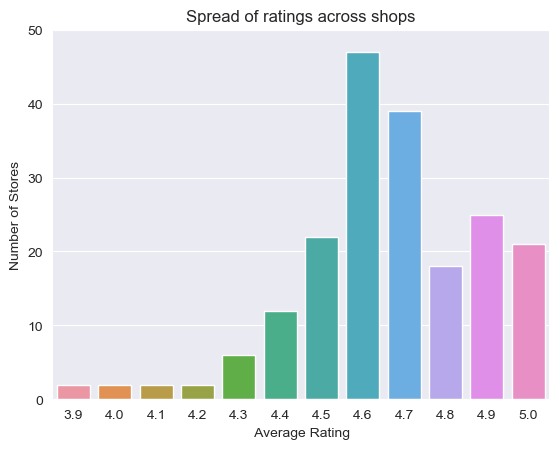

In [30]:
store_ratings = (
    coffee_cleaned.query("Rating > 0")["Rating"]
    .value_counts()
    .sort_index(ascending=False)
    .reset_index()
    .rename(columns={"count": "number_of_ratings"})
)
ax = sns.barplot(x="Rating", y="number_of_ratings", data=store_ratings)
ax = ax.set(
    xlabel=" Average Rating",
    ylabel="Number of Stores",
    title="Spread of ratings across shops",
    yticks=range(0, 55, 10),
)
sns.despine(left=True)
sns.set_style("darkgrid")
store_ratings.head()
sns.color_palette()

### Observation
- From the above bar chart, it looks like the most common rating awarded is 4.6 at 47 entries, followed closely by a 4.7 rating at 39 entries
- Ratings of 4.5, 4.9, 5.0 are also closely matched with total entries at 22, 25, and 21 respectively

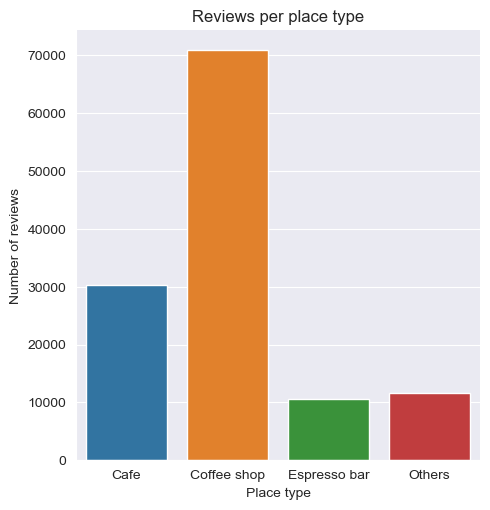

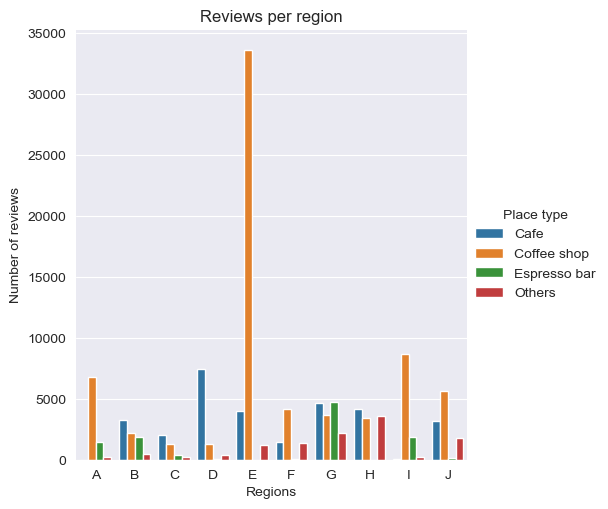

In [31]:
place_type_reviews = coffee_cleaned.groupby(['Place type'])[['Rating','Reviews']].agg({'Rating':'min','Reviews':'sum'}).reset_index()
regions_reviews = coffee_cleaned.groupby(['Region','Place type'])['Reviews'].sum().reset_index()

ax = sns.catplot(place_type_reviews,x='Place type',y='Reviews',kind='bar')
ax1 = sns.catplot(data=regions_reviews, x = 'Region',y='Reviews',hue='Place type',kind='bar')
ax.set(title= 'Reviews per place type', xlabel='Place type',ylabel='Number of reviews')
ax1.set(title= 'Reviews per region', xlabel='Regions',ylabel='Number of reviews')
sns.despine(left=True)
# place_type_reviews
# regions_reviews.head()
# plt.show()

The chart above shows the spread of reviews across the different regions, and further breaks it down according to different shop categories in each region.

The Coffee shops in Region E have a relatively high number of reviews when compared to other regions and shops. upon further investigation, it was discovered that
the most reviewed shop (Lviv Coffee Manufacture) has 6x as many reviews as the 2nd most reviewed shop. Lviv Cofffee might just be as popular but a further probing into its reviews might be needed before any further conclusions can be drawn.

In [32]:
coffee_cleaned.sort_values('Reviews',ascending=False).head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
100,E,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,True,True,True
101,E,Svit Kavy,Coffee shop,4.6,2931.0,$$,False,True,True
165,I,Kofeyin,Coffee shop,4.5,2914.0,$$,False,True,True
110,E,Вірменка,Coffee shop,4.8,2873.0,$$,False,True,True
81,A,Traveler`s Coffee,Coffee shop,4.6,2700.0,$$,True,True,True


[Text(0.5, 1.0, 'Reviews per region'),
 Text(0.5, 0, 'Regions'),
 Text(0, 0.5, 'Number of reviews')]

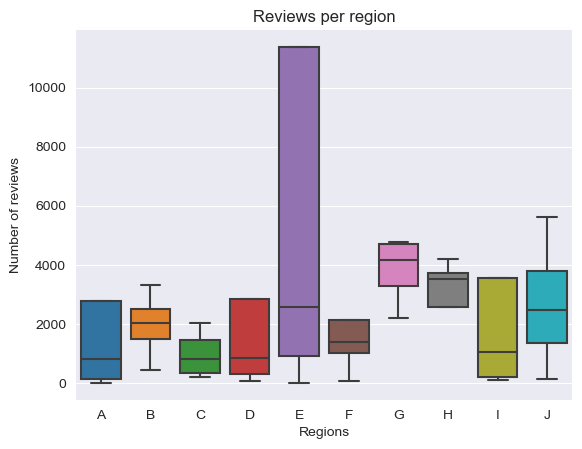

In [33]:
ax1 = sns.boxplot(data=regions_reviews, x = 'Region',y='Reviews', showfliers=False)
ax1.set(title= 'Reviews per region', xlabel='Regions',ylabel='Number of reviews')
sns.despine(left=True)


[Text(0.5, 1.0, 'Relation between Reviews and Rating with Dine In Option')]

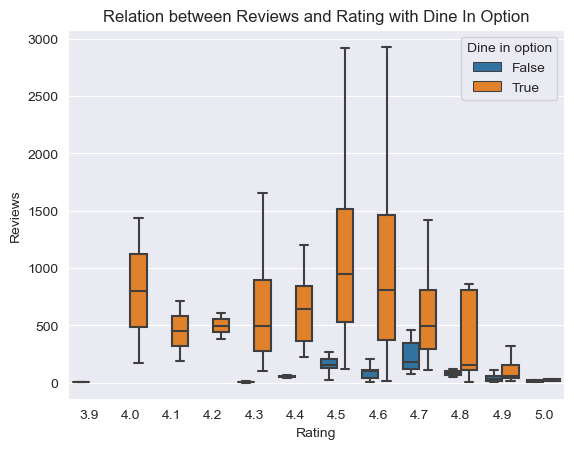

In [393]:
ax =sns.boxplot(data=coffee_cleaned, x='Rating',y='Reviews', hue='Dine in option',showfliers=False)
ax.set(title='Relation between Reviews and Rating with Dine In Option')

In [34]:
coffee_cleaned.sort_values(by='Reviews',ascending=False).head()

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
100,E,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,True,True,True
101,E,Svit Kavy,Coffee shop,4.6,2931.0,$$,False,True,True
165,I,Kofeyin,Coffee shop,4.5,2914.0,$$,False,True,True
110,E,Вірменка,Coffee shop,4.8,2873.0,$$,False,True,True
81,A,Traveler`s Coffee,Coffee shop,4.6,2700.0,$$,True,True,True


In [35]:
coffee_cleaned[coffee_cleaned[['Region','Place name']].duplicated(keep=False)].sort_values('Place name')

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
171,I,Dim Kavy,Espresso bar,4.7,185.0,$$,False,False,False
172,I,Dim Kavy,Others,4.7,222.0,$$,False,True,True
151,G,Kaffa,Cafe,4.7,1281.0,$$,False,True,True
154,G,Kaffa,Espresso bar,4.8,824.0,$$,False,True,True
100,E,Lviv Coffee Manufacture,Coffee shop,4.7,17937.0,$$,True,True,True
108,E,Lviv Coffee Manufacture,Coffee shop,4.5,778.0,$$,False,True,True
120,D,SV Кафе,Cafe,4.5,998.0,$$,True,True,True
132,D,SV Кафе,Cafe,4.6,740.0,$$,False,True,True
101,E,Svit Kavy,Coffee shop,4.6,2931.0,$$,False,True,True
107,E,Svit Kavy,Coffee shop,4.3,102.0,$$,False,True,True


In [36]:
reviews_and_ratings = coffee_cleaned.query('Reviews <=10000 and Rating >=3.9')


## Task 3: Distribution of the number of reivews

<Axes: xlabel='Reviews', ylabel='Count'>

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
170,I,"Dom Kofe, Mah.",Coffee shop,4.3,3.0,$$,False,False,False
190,H,"""Франс.уа"" кофейня-пекарня",Cafe,3.9,9.0,$$,False,False,True
99,A,Coffee break ZAVIDA,Coffee shop,4.9,10.0,$$,False,False,False
160,I,КофеТочка Харьков - интернет-магазин кофе и кофеоборудования,Others,3.9,10.0,$$,False,False,False
19,C,Coffee Drive,Coffee shop,4.8,10.0,$$,False,True,True


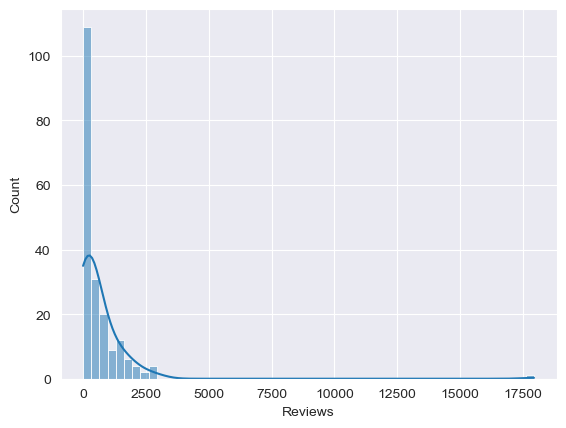

In [37]:
sns.histplot(coffee_cleaned['Reviews'],kde=True,bins=55)
# sns.displot(reviews_and_ratings['Reviews'],kde=True,bins=25)
reviews_and_ratings.sort_values('Reviews').head()

The chart above is heavily skewed to the right. It shows that most of the shops get little to no reviews even though there are a few shops with lots of reviews. These highly reviewed shops are the outliers in the dataset

## Task 4: Relationship between Ratings and number of reviews

[Text(0.5, 1.0, 'Ratings and Reviews'),
 Text(0.5, 0, 'Rating'),
 Text(0, 0.5, 'Number of Reviews')]

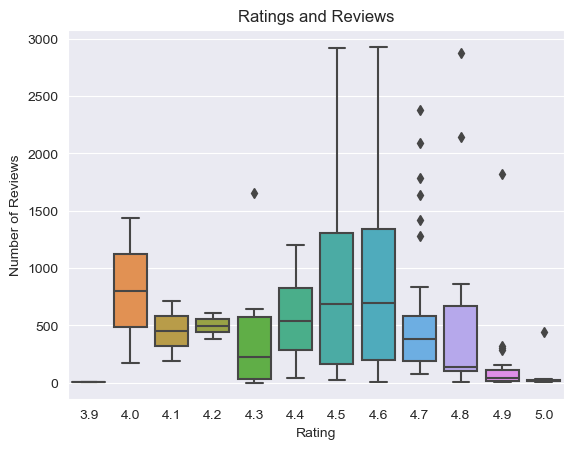

In [38]:

# reviews_and_ratings.head()
# sns.scatterplot(reviews_and_ratings, y ='Reviews', x = 'Rating_jitter',alpha=0.5, size=0.01)
# sns.histplot(reviews_and_ratings['Reviews'])
ax = sns.boxplot(reviews_and_ratings,x='Rating',y='Reviews',whis=1.5)
ax.set(title='Ratings and Reviews', xlabel='Rating',ylabel='Number of Reviews')

The figure above showcases the relationship between the number of reviews given and the mean rating. From the chart, it looks like the places with the most reviews tend to fall between a 4.5 to 4.6 rating. Customers also tend to not give a shop the very low or high ratings (5.0, less than 4)

## Task 5: Predicting number of reviews
- This is a regression problem

## Task 6: Fitting a baseline prediction model

In [41]:
# Set dummy variables for categorical columns (Region, Place type, Price)
coffee_ml = pd.get_dummies(coffee_cleaned[['Region','Place type','Price']],drop_first=True)
coffee_ml = pd.concat([coffee_ml,coffee_cleaned],axis=1)
coffee_ml = coffee_ml.drop(['Region','Place name','Place type','Price'],axis=1)
coffee_ml[['Delivery option','Dine in option','Takeout option']] = coffee_ml[['Delivery option','Dine in option','Takeout option']].astype('int')

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeRegressor

In [43]:
X = coffee_ml.drop(['Reviews'],axis=1)
y = coffee_ml['Reviews']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=SEED)

In [44]:
linreg = LinearRegression(positive=True)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
linreg.score(X_test,y_test)
y_pred = linreg.predict(X_test)
# linreg.score(y_pred,y_test)
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge.score(X_test,y_test)

LinearRegression(positive=True)

-2.5021864692456006

Ridge()

-2.1934006375611945

In [45]:
def find_best_model(X,y):
    params_gd = {
        'linear_regression':{
            'model':LinearRegression(),
            'params': {
                'fit_intercept':[True,False],
                'positive':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params': {
                'alpha':[1,2,5,10],
                'selection':['random','cyclic'],
                'positive':[True,False],
                'max_iter':[1000,2000],
                'fit_intercept':[True,False]
            }
        },
        'dct':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['absolute_error','friedman_mse'],
                'splitter':['best','random'],
                'max_depth':[None,1,6,10],
                'min_samples_leaf':[1,0.8,0.5,0.2]
            }
        }
    }

    scores = []
    cv = KFold(n_splits=5, random_state = SEED, shuffle=True)
    for model_name, model_cofig in params_gd.items():
        gs = GridSearchCV(model_cofig['model'], model_cofig['params'],cv=cv,return_train_score=False, n_jobs=-1)
        gs.fit(X,y)
        scores.append({
            'model':model_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
            })
    return pd.DataFrame(scores)


In [46]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,-0.47723,"{'fit_intercept': False, 'positive': True}"
1,lasso,-0.37459,"{'alpha': 10, 'fit_intercept': False, 'max_iter': 1000, 'positive': True, 'selection': 'cyclic'}"
2,dct,0.09914,"{'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 0.2, 'splitter': 'best'}"
